In [24]:
import os
import json
import numpy as np

KEYPOINT_INDICES = {
    "nose": 0,
    "neck": 1,
    "right_shoulder": 2,
    "right_elbow": 3,
    "right_wrist": 4,
    "left_shoulder": 5,
    "left_elbow": 6,
    "left_wrist": 7,
    "mid_hip": 8,
    "right_hip": 9,
    "right_knee": 10,
    "right_ankle": 11,
    "left_hip": 12,
    "left_knee": 13,
    "left_ankle": 14,
    "right_eye": 15,
    "left_eye": 16,
    "right_ear": 17,
    "left_ear": 18,
    "left_big_toe": 19,
    "left_small_toe": 20,
    "left_heel": 21,
    "right_big_toe": 22,
    "right_small_toe": 23,
    "right_heel": 24
}

def clean_keypoints(keypoints, max_distance=300, smoothing=False):
    cleaned = [keypoints[0]] if keypoints else []
    for i in range(1, len(keypoints)):
        distance = np.linalg.norm(np.array(keypoints[i]) - np.array(cleaned[-1]))
        if distance > max_distance:
            if smoothing:
                next_valid = next((kp for kp in keypoints[i+1:] 
                                   if np.linalg.norm(np.array(kp) - np.array(cleaned[-1])) <= max_distance), None)
                interpolated = np.mean([cleaned[-1], next_valid], axis=0) if next_valid is not None else cleaned[-1]
                cleaned.append(interpolated)
            else:
                cleaned.append((np.nan, np.nan))
        else:
            cleaned.append(keypoints[i])
    return cleaned


def analyze_athlete(athlete_name, lap_id, base_folder, confidence_threshold=0.1):
    athlete_name_formatted = athlete_name.replace(" ", "_")
    folder_name = f"{athlete_name_formatted}_Lap{lap_id}"
    folder_path = os.path.join(base_folder, folder_name)

    keypoints = {joint: [] for joint in KEYPOINT_INDICES}
    file_count = 0

    for json_file in os.listdir(folder_path):
        if json_file.endswith(".json"):
            try:
                with open(os.path.join(folder_path, json_file), 'r') as file:
                    data = json.load(file)
                    file_count += 1

                    for person in data.get('people', []):
                        pose_keypoints_2d = person.get('pose_keypoints_2d', [])
                        for joint, index in KEYPOINT_INDICES.items():
                            x = pose_keypoints_2d[index * 3]
                            y = pose_keypoints_2d[index * 3 + 1]
                            confidence = pose_keypoints_2d[index * 3 + 2]

                            if x == 0 and y == 0 or confidence < confidence_threshold:
                                keypoints[joint].append((np.nan, np.nan))
                            else:
                                keypoints[joint].append((x, y))
            except Exception as e:
                print(f"Error processing file {json_file}: {e}")
                continue

    print(f"Processed {file_count} files.")

    # Trimming and cleaning the keypoints
    trimmed_keypoints = {joint: clean_keypoints(values[0:]) for joint, values in keypoints.items()}
    cleaned_keypoints = {joint: values for joint, values in trimmed_keypoints.items()}

    for joint, values in cleaned_keypoints.items():
        print(f"{joint}: {len(values)} cleaned keypoints")

    return cleaned_keypoints if file_count > 0 else None

# Main script to get user input and analyze athlete
athlete_name = input("Enter athlete's name: ")
lap_id = input("Enter lap ID: ")
base_folder = r'C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG'

keypoints_data = analyze_athlete(athlete_name, lap_id, base_folder)

Enter athlete's name: Lizzie Bigelow
Enter lap ID: 5.1
Processed 175 files.
nose: 177 cleaned keypoints
neck: 177 cleaned keypoints
right_shoulder: 177 cleaned keypoints
right_elbow: 177 cleaned keypoints
right_wrist: 177 cleaned keypoints
left_shoulder: 177 cleaned keypoints
left_elbow: 177 cleaned keypoints
left_wrist: 177 cleaned keypoints
mid_hip: 177 cleaned keypoints
right_hip: 177 cleaned keypoints
right_knee: 177 cleaned keypoints
right_ankle: 177 cleaned keypoints
left_hip: 177 cleaned keypoints
left_knee: 177 cleaned keypoints
left_ankle: 177 cleaned keypoints
right_eye: 177 cleaned keypoints
left_eye: 177 cleaned keypoints
right_ear: 177 cleaned keypoints
left_ear: 177 cleaned keypoints
left_big_toe: 177 cleaned keypoints
left_small_toe: 177 cleaned keypoints
left_heel: 177 cleaned keypoints
right_big_toe: 177 cleaned keypoints
right_small_toe: 177 cleaned keypoints
right_heel: 177 cleaned keypoints


In [25]:
import pandas as pd

def save_keypoints_to_csv(keypoints_data, save_path, file_name):
    """
    Saves the keypoints data to a CSV file.

    :param keypoints_data: Dictionary containing keypoints data.
    :param save_path: The directory path to save the CSV file.
    :param file_name: The name of the file to be saved.
    """
    # Creating a DataFrame from the keypoints data
    df = pd.DataFrame.from_dict(keypoints_data, orient='index').transpose()

    # Constructing full file path
    full_file_path = os.path.join(save_path, file_name)

    # Saving to CSV
    df.to_csv(full_file_path, index=False)
    print(f"Data saved to {full_file_path}")

# Main script to get user input, analyze athlete and save keypoints data
athlete_name = input("Enter athlete's name: ")
lap_id = input("Enter lap ID: ")
base_folder = r'C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG'
save_folder = r'C:\Users\dgriff06\AthleteAnalysis'  # Folder where you want to save the CSV

keypoints_data = analyze_athlete(athlete_name, lap_id, base_folder)
if keypoints_data:
    save_file_name = f"{athlete_name.replace(' ', '_')}_Lap{lap_id}_keypoints.csv"
    save_keypoints_to_csv(keypoints_data, save_folder, save_file_name)



Enter athlete's name: Lizzie Bigelow
Enter lap ID: 5.1
Processed 175 files.
nose: 177 cleaned keypoints
neck: 177 cleaned keypoints
right_shoulder: 177 cleaned keypoints
right_elbow: 177 cleaned keypoints
right_wrist: 177 cleaned keypoints
left_shoulder: 177 cleaned keypoints
left_elbow: 177 cleaned keypoints
left_wrist: 177 cleaned keypoints
mid_hip: 177 cleaned keypoints
right_hip: 177 cleaned keypoints
right_knee: 177 cleaned keypoints
right_ankle: 177 cleaned keypoints
left_hip: 177 cleaned keypoints
left_knee: 177 cleaned keypoints
left_ankle: 177 cleaned keypoints
right_eye: 177 cleaned keypoints
left_eye: 177 cleaned keypoints
right_ear: 177 cleaned keypoints
left_ear: 177 cleaned keypoints
left_big_toe: 177 cleaned keypoints
left_small_toe: 177 cleaned keypoints
left_heel: 177 cleaned keypoints
right_big_toe: 177 cleaned keypoints
right_small_toe: 177 cleaned keypoints
right_heel: 177 cleaned keypoints
Data saved to C:\Users\dgriff06\AthleteAnalysis\Lizzie_Bigelow_Lap5.1_keypoi

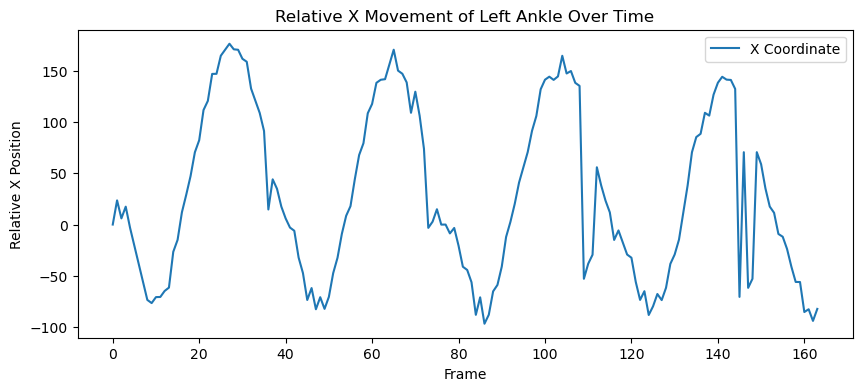

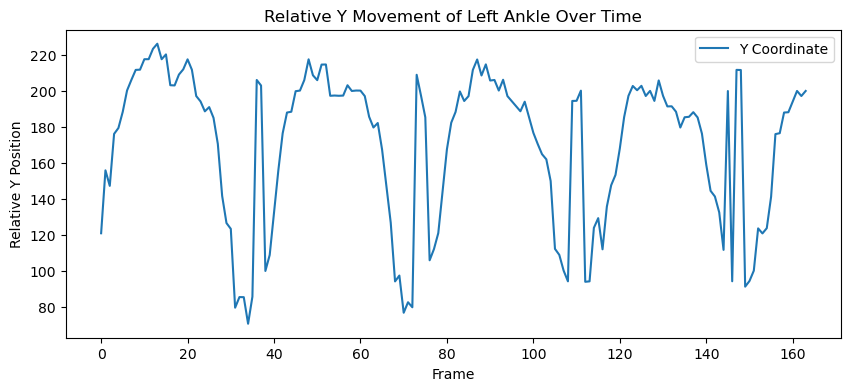

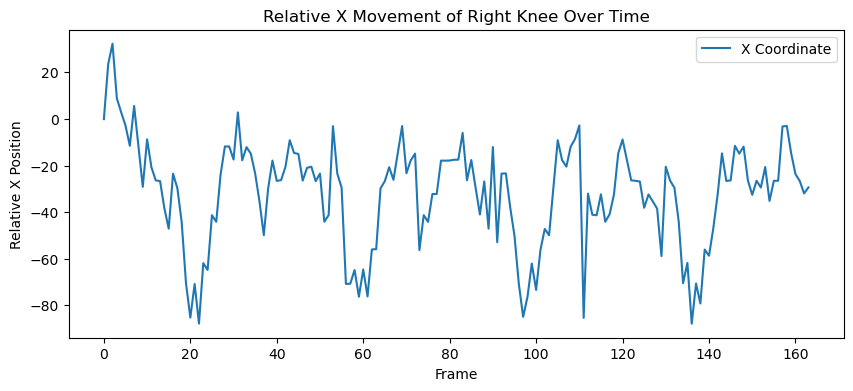

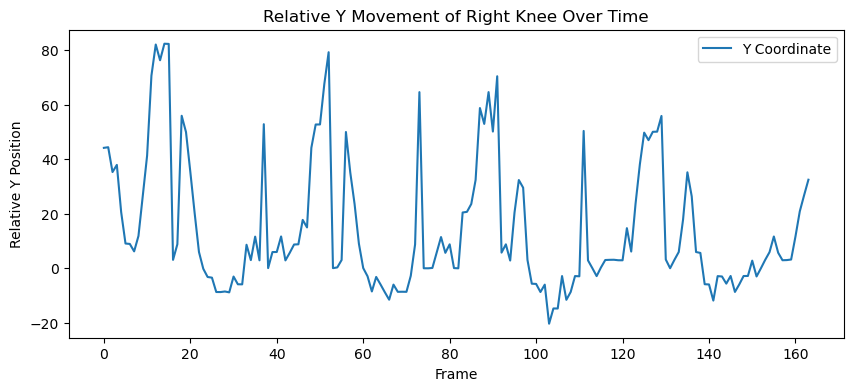

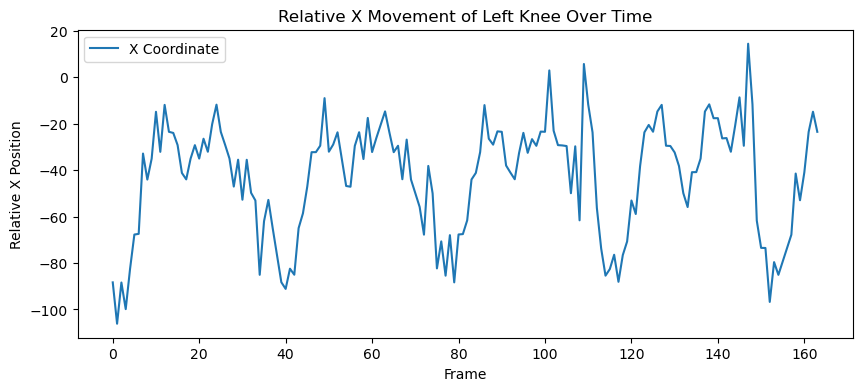

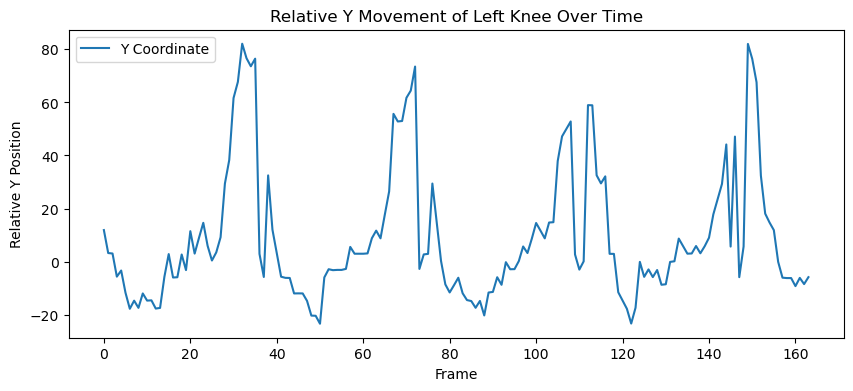

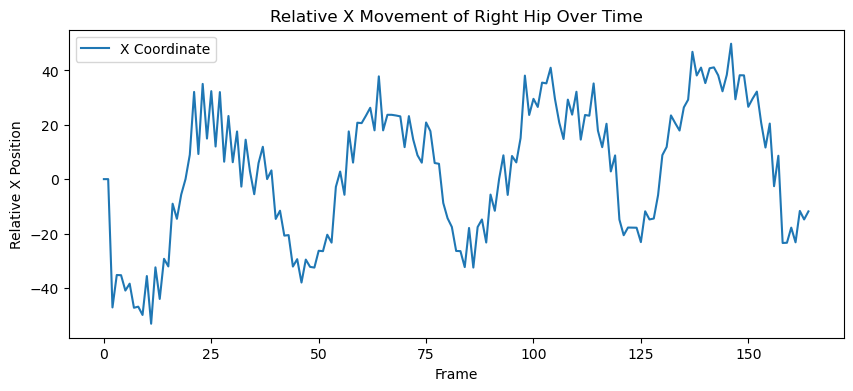

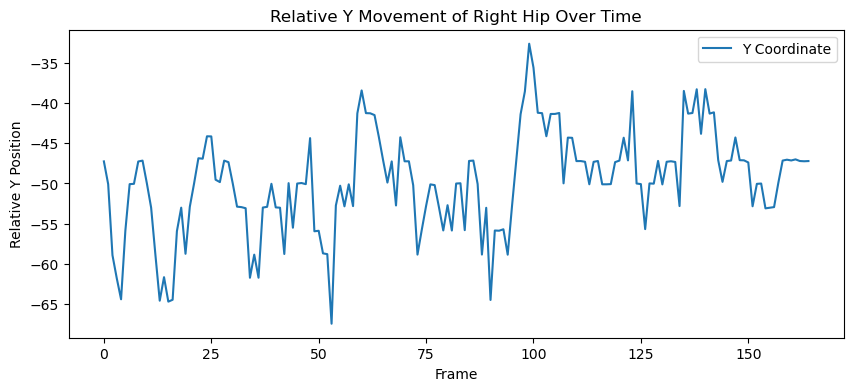

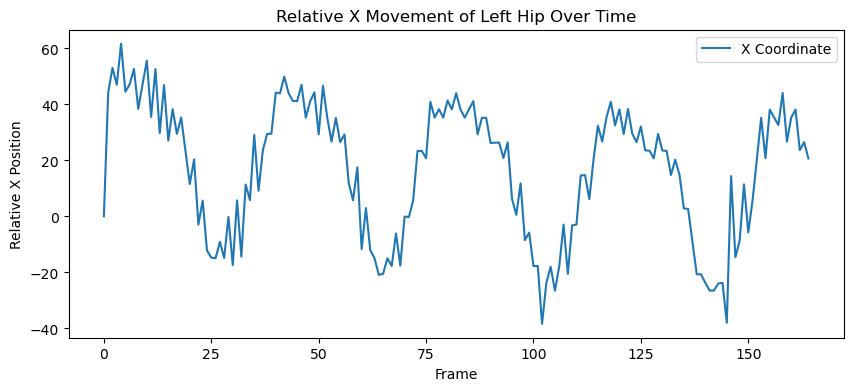

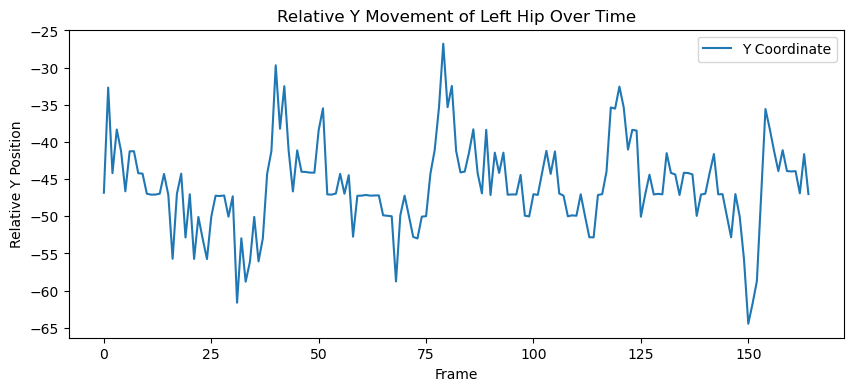

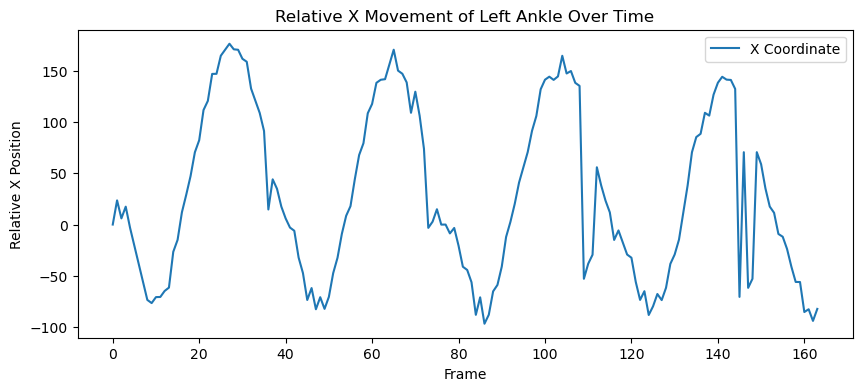

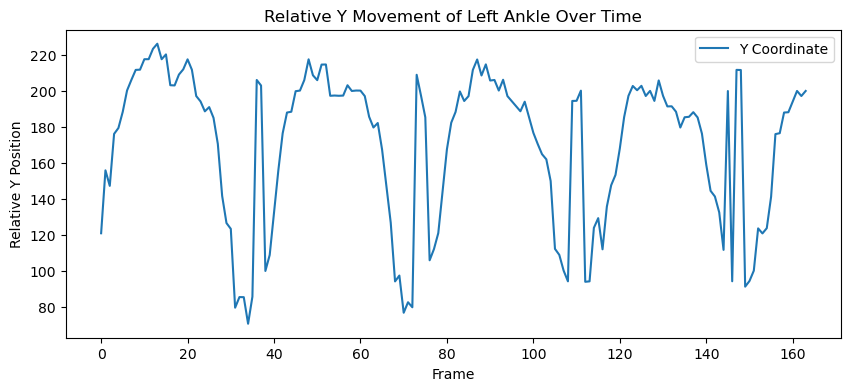

In [26]:
import matplotlib.pyplot as plt
import numpy as np

athlete_name = "Lizzie Bigelow"  # Replace with actual name
lap_id = "1.1"               # Replace with actual lap ID
def save_data_as_csv(data, metric_name, athlete_name, lap_id):
    import pandas as pd
    df = pd.DataFrame(data)
    csv_filename = f"{athlete_name}_{lap_id}_{metric_name.replace(' ', '_')}.csv"
    df.to_csv(csv_filename, index=False)

# Assuming keypoints_data is already loaded and contains the required data

# Function to calculate the midpoint between two points
def get_midpoint(point1, point2):
    return (point1 + point2) / 2

# Function to calculate relative positions
def calculate_relative_positions(keypoints_data, reference_parts, target_part):
    relative_positions = []
    num_frames = len(keypoints_data[target_part])
    for i in range(num_frames):
        if all(np.any(keypoints_data[part][i]) for part in reference_parts + [target_part]):
            ref_point = np.mean([np.array(keypoints_data[part][i]) for part in reference_parts], axis=0)
            target_point = np.array(keypoints_data[target_part][i])
            relative_position = target_point - ref_point
            relative_positions.append(relative_position)
        else:
            relative_positions.append(np.array([np.nan, np.nan]))
    return relative_positions

# Function to calculate and plot the joint movement
def remove_outliers_iqr(data):
    """
    Remove outliers using the Interquartile Range (IQR) method.
    """
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    return [x for x in data if lower_bound <= x <= upper_bound]

# Example usage in your existing plotting function
def calculate_and_plot_joint(joint_name, reference_parts, title, athlete_name, lap_id, trim_frames=5):
    relative_positions = calculate_relative_positions(keypoints_data, reference_parts, joint_name)

    # Trim the last few frames
    relative_positions = relative_positions[:-trim_frames] if len(relative_positions) > trim_frames else relative_positions

    x_coords = [pos[0] for pos in relative_positions if np.all(np.isfinite(pos))]
    y_coords = [pos[1] for pos in relative_positions if np.all(np.isfinite(pos))]

    # Remove outliers
    x_coords_cleaned = remove_outliers_iqr(x_coords)
    y_coords_cleaned = remove_outliers_iqr(y_coords)


    # Plot X Coordinates and Save
    plt.figure(figsize=(10, 4))
    plt.plot(x_coords, label='X Coordinate')
    plt.xlabel('Frame')
    plt.ylabel('Relative X Position')
    plt.title(f'Relative X Movement of {title} Over Time')
    plt.legend()
    plot_filename_x = f"{athlete_name}_{lap_id}_{title.replace(' ', '_')}_X.png"
    plt.savefig(plot_filename_x)  # Save plot as image
    plt.show()

    # Plot Y Coordinates and Save
    plt.figure(figsize=(10, 4))
    plt.plot(y_coords, label='Y Coordinate')
    plt.xlabel('Frame')
    plt.ylabel('Relative Y Position')
    plt.title(f'Relative Y Movement of {title} Over Time')
    plt.legend()
    plot_filename_y = f"{athlete_name}_{lap_id}_{title.replace(' ', '_')}_Y.png"
    plt.savefig(plot_filename_y)  # Save plot as image
    plt.show()

    # Save relative positions data as CSV
    save_data_as_csv(relative_positions, f"{title} Relative Positions", athlete_name, lap_id)

# Function to calculate angle
def calculate_angle(pointA, pointB, pointC):
    a = np.linalg.norm(np.array(pointC) - np.array(pointB))
    b = np.linalg.norm(np.array(pointA) - np.array(pointC))
    c = np.linalg.norm(np.array(pointB) - np.array(pointA))
    angle = np.arccos((a**2 + c**2 - b**2) / (2 * a * c))
    return np.degrees(angle)

# Function to analyze and plot spine/head posture
def analyze_spine_posture(keypoints_data, athlete_name, lap_id, trim_frames=5):
    angles = []
    for mid_hip, neck, nose in zip(keypoints_data['mid_hip'], keypoints_data['neck'], keypoints_data['nose']):
        if all(np.any(kp) for kp in [mid_hip, neck, nose]):
            angle = calculate_angle(mid_hip, neck, nose)
            angles.append(angle)
        else:
            angles.append(np.nan)

    # Trim and clean the data
    angles = angles[:-trim_frames] if len(angles) > trim_frames else angles
    clean_angles = [angle for angle in angles if not np.isnan(angle)]

    # Check if there is sufficient data to plot
    if len(clean_angles) < len(angles) * 0.5:  # Example threshold
        print(f"Not enough data to plot posture angle for {athlete_name} on lap {lap_id}.")
        return


    # Plot and Save Posture Angle
        plt.figure(figsize=(10, 4))
        plt.plot(angles, label='Spine/Head Angle')
        plt.xlabel('Frame')
        plt.ylabel('Angle (degrees)')
        plt.title('Posture Angle Over Time')
        plt.legend()
        plot_filename = f"{athlete_name}_{lap_id}_Spine_Head_Posture.png"
        plt.savefig(plot_filename)  # Save plot as image
        plt.show()

        # Save angles data as CSV
        save_data_as_csv(angles, "Spine Head Posture Angles", athlete_name, lap_id)


# Analyze and plot for different joints
# Corrected calls to the function
calculate_and_plot_joint('left_ankle', ['left_hip', 'right_hip'], 'Left Ankle', athlete_name, lap_id)
calculate_and_plot_joint('right_knee', ['right_hip', 'right_ankle'], 'Right Knee', athlete_name, lap_id)
calculate_and_plot_joint('left_knee', ['left_hip', 'left_ankle'], 'Left Knee', athlete_name, lap_id)
calculate_and_plot_joint('right_hip', ['mid_hip', 'right_knee'], 'Right Hip', athlete_name, lap_id)
calculate_and_plot_joint('left_hip', ['mid_hip', 'left_knee'], 'Left Hip', athlete_name, lap_id)


# Analyze and plot spine/head posture
calculate_and_plot_joint('left_ankle', ['left_hip', 'right_hip'], 'Left Ankle', athlete_name, lap_id)
analyze_spine_posture(keypoints_data, athlete_name, lap_id)




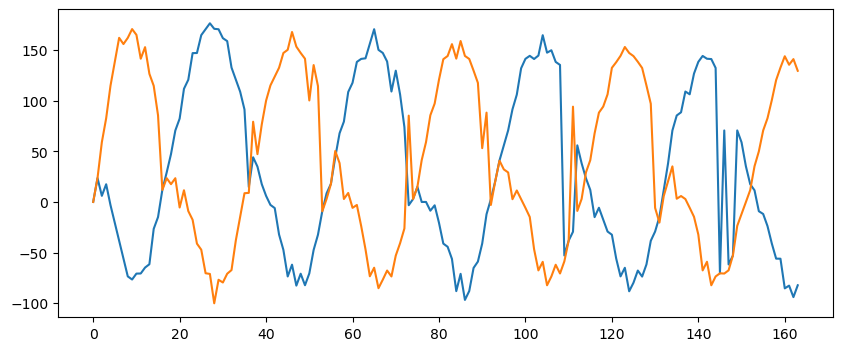

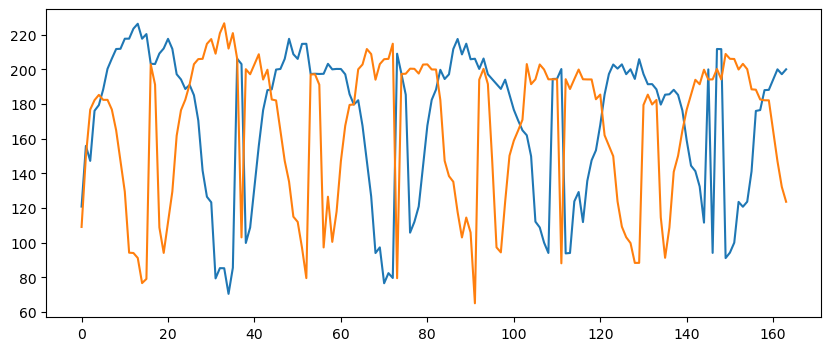

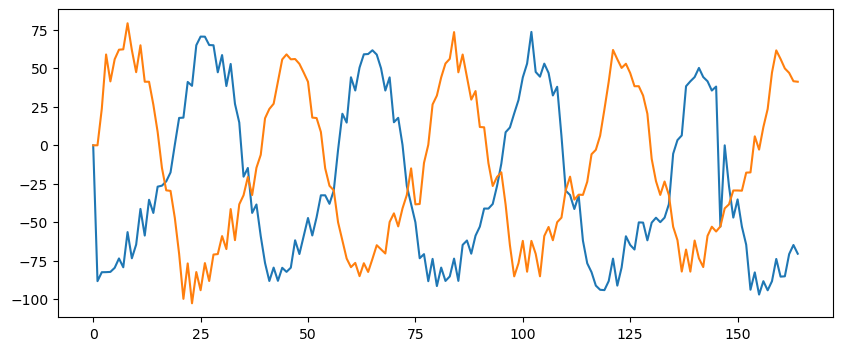

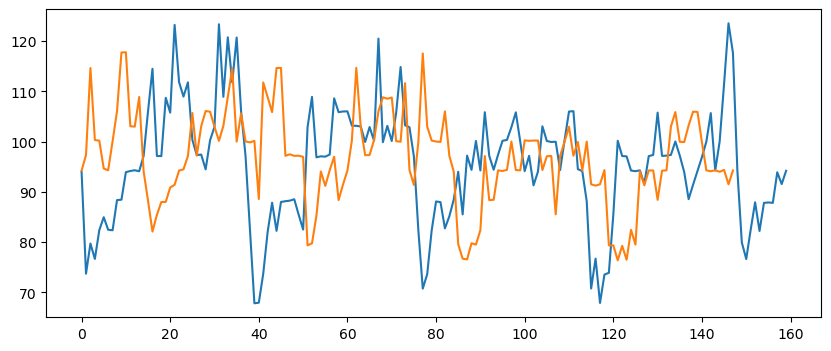

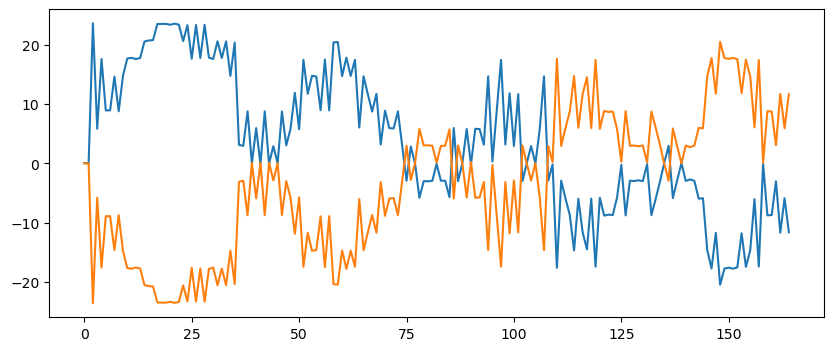

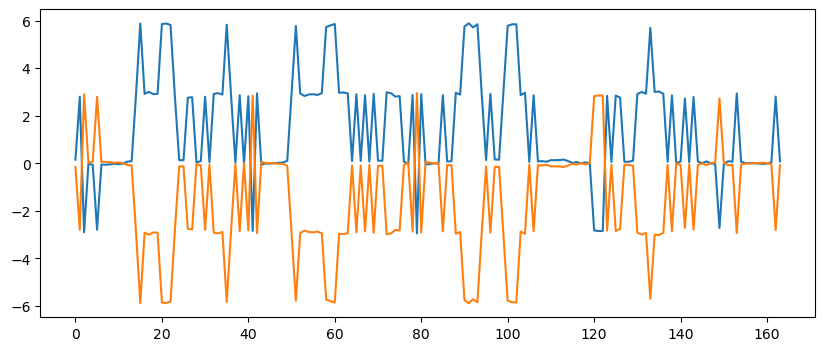

In [27]:
def plot_symmetry(keypoints_data, joint_left, joint_right, title, athlete_name, lap_id, trim_frames=5):
    # Calculate relative positions
    rel_positions_left = calculate_relative_positions(keypoints_data, ['left_hip', 'right_hip'], joint_left)
    rel_positions_right = calculate_relative_positions(keypoints_data, ['left_hip', 'right_hip'], joint_right)

    # Trim the data to remove outliers at the end
    rel_positions_left = rel_positions_left[:-trim_frames] if len(rel_positions_left) > trim_frames else rel_positions_left
    rel_positions_right = rel_positions_right[:-trim_frames] if len(rel_positions_right) > trim_frames else rel_positions_right

    # Extract X and Y coordinates and remove outliers
    x_coords_left = remove_outliers_iqr([pos[0] for pos in rel_positions_left if np.all(np.isfinite(pos))])
    y_coords_left = remove_outliers_iqr([pos[1] for pos in rel_positions_left if np.all(np.isfinite(pos))])
    x_coords_right = remove_outliers_iqr([pos[0] for pos in rel_positions_right if np.all(np.isfinite(pos))])
    y_coords_right = remove_outliers_iqr([pos[1] for pos in rel_positions_right if np.all(np.isfinite(pos))])

    # Plot and save X coordinates
    plot_filename_x = f"{athlete_name}_{lap_id}_{title}_Symmetry_X.png"
    plt.figure(figsize=(10, 4))
    plt.plot(x_coords_left, label=f'Left {title} X Coordinate')
    plt.plot(x_coords_right, label=f'Right {title} X Coordinate')
    # [Add axes labels, title, legend, etc.]
    plt.savefig(plot_filename_x)  # Save X plot
    plt.show()

    # Plot and save Y coordinates
    plot_filename_y = f"{athlete_name}_{lap_id}_{title}_Symmetry_Y.png"
    plt.figure(figsize=(10, 4))
    plt.plot(y_coords_left, label=f'Left {title} Y Coordinate')
    plt.plot(y_coords_right, label=f'Right {title} Y Coordinate')
    # [Add axes labels, title, legend, etc.]
    plt.savefig(plot_filename_y)  # Save Y plot
    plt.show()

    # Save data as CSV
    save_data_as_csv(rel_positions_left, f"{title}_Left_Relative_Positions", athlete_name, lap_id)
    save_data_as_csv(rel_positions_right, f"{title}_Right_Relative_Positions", athlete_name, lap_id)

# Usage of the function
plot_symmetry(keypoints_data, 'left_ankle', 'right_ankle', 'Ankle', athlete_name, lap_id)
plot_symmetry(keypoints_data, 'left_knee', 'right_knee', 'Knee', athlete_name, lap_id)
plot_symmetry(keypoints_data, 'left_hip', 'right_hip', 'Hip', athlete_name, lap_id)

In [32]:
import pandas as pd
import numpy as np

# Function to remove outliers
def remove_outliers(data, num_std_dev=3):
    data_array = np.array(data)
    mean = np.nanmean(data_array)
    std_dev = np.nanstd(data_array)
    z_scores = np.abs((data_array - mean) / std_dev)
    filtered_data = data_array[z_scores < num_std_dev]
    return filtered_data.tolist()

# Function to calculate Cyclical Asymmetry Index
def calculate_cyclical_ai(left_cycle_data, right_cycle_data):
    rom_left = np.ptp(left_cycle_data)
    rom_right = np.ptp(right_cycle_data)
    cyclical_ai = np.abs(rom_left - rom_right) / ((rom_left + rom_right) / 2) * 100
    return cyclical_ai

# Main function to calculate and save Cyclical AI
def analyze_and_save_cyclical_ai(keypoints_data, joint_left, joint_right, athlete_name, lap_id):
    # Extracting data for left and right joints
    left_data = [point[0] for point in keypoints_data[joint_left] if np.any(point)]
    right_data = [point[0] for point in keypoints_data[joint_right] if np.any(point)]

    # Removing outliers
    filtered_left = remove_outliers(left_data)
    filtered_right = remove_outliers(right_data)

    # Calculating Cyclical AI
    cyclical_ai = calculate_cyclical_ai(filtered_left, filtered_right)

    # Saving to CSV
    ai_data = {
        'Athlete': [athlete_name],
        'Lap ID': [lap_id],
        'Joint': [f"{joint_left} vs {joint_right}"],
        'Cyclical Asymmetry Index': [cyclical_ai]
    }
    df = pd.DataFrame(ai_data)
    csv_filename = f"{athlete_name}_{lap_id}_{joint_left}_vs_{joint_right}_Cyclical_AI.csv"
    df.to_csv(csv_filename, index=False)

    return cyclical_ai

# Example usage
athlete_name = "Lizzie Bigelow"
lap_id = "1.1"
cyclical_ai_stride = analyze_and_save_cyclical_ai(keypoints_data, 'left_knee', 'left_hip', athlete_name, lap_id)
print(f"Cyclical Asymmetry Index for Full Stride: {cyclical_ai_stride}%")



Cyclical Asymmetry Index for Full Stride: 1.4568472907319974%


In [9]:
import pandas as pd
import numpy as np

def calculate_ai(left_data, right_data):
    """
    Calculate Asymmetry Index (AI) between left and right data.
    AI = (|left - right| / ((left + right) / 2)) * 100
    """
    min_length = min(len(left_data), len(right_data))
    left_data = np.array(left_data[:min_length])
    right_data = np.array(right_data[:min_length])

    ai_values = np.abs(left_data - right_data) / ((left_data + right_data) / 2) * 100
    return np.nanmean(ai_values)

def calculate_and_save_ai(keypoints_data, joints, athlete_name, lap_id):
    ai_results = {}
    for joint in joints:
        left_joint_x = [point[0] for point in keypoints_data[f'left_{joint}'] if np.any(point)]
        right_joint_x = [point[0] for point in keypoints_data[f'right_{joint}'] if np.any(point)]

        ai = calculate_ai(left_joint_x, right_joint_x)
        ai_results[joint] = ai

    # Save AI results to CSV
    ai_data = []
    for joint, ai in ai_results.items():
        ai_data.append({'Joint': joint, 'Asymmetry Index': ai})

    df = pd.DataFrame(ai_data)
    csv_filename = f"{athlete_name}_{lap_id}_Asymmetry_Index.csv"
    df.to_csv(csv_filename, index=False)

    return ai_results

# Example usage
athlete_name = "Lizzie Bigelow"
lap_id = "3.1"
joints = ['ankle', 'knee', 'hip', 'shoulder']
ai_results = calculate_and_save_ai(keypoints_data, joints, athlete_name, lap_id)

# Print AI results for each joint
for joint, ai in ai_results.items():
    print(f"Asymmetry Index for {joint.title()}: {ai}%")


Asymmetry Index for Ankle: 16.499582949123216%
Asymmetry Index for Knee: 16.257796744152493%
Asymmetry Index for Hip: 3.564417080873411%
Asymmetry Index for Shoulder: 4.775481650690929%


Enter athlete's name: Lizzie Bigelow
Enter lap ID: 1.1


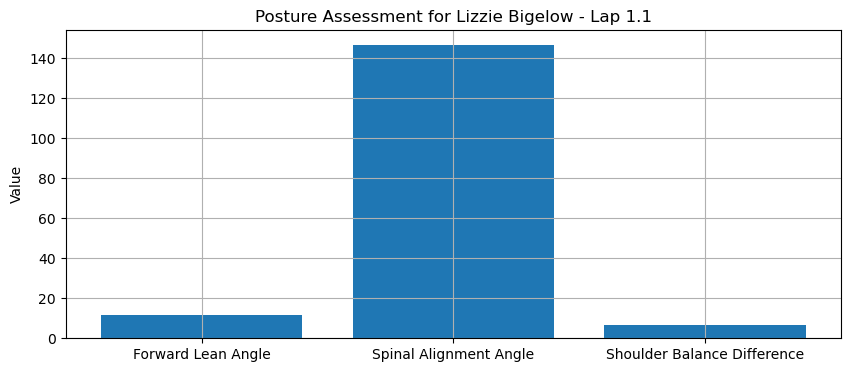

Results saved to C:\Users\dgriff06\AthleteAnalysis/Lizzie Bigelow_Lap1.1_posture_analysis.csv
Plot saved to C:\Users\dgriff06\AthleteAnalysis/Lizzie Bigelow_Lap1.1_posture_analysis.png


In [10]:
import pandas as pd

# Assuming calculate_relative_positions, calculate_forward_lean_angle, calculate_spinal_alignment, and calculate_shoulder_balance functions are already defined
def calculate_forward_lean_angle(y_coords_hips, y_coords_shoulders):
    avg_y_hips = np.mean(y_coords_hips)
    avg_y_shoulders = np.mean(y_coords_shoulders)
    vertical_distance = abs(avg_y_shoulders - avg_y_hips)
    horizontal_distance = 1  # Can be adjusted
    angle_rad = np.arctan(vertical_distance / horizontal_distance)
    return np.degrees(angle_rad)

def calculate_spinal_alignment(keypoints_data):
    # Assuming keypoints for mid_hip, neck, and head are available
    mid_hip_positions = np.array(keypoints_data['mid_hip'])
    neck_positions = np.array(keypoints_data['neck'])
    head_positions = np.array(keypoints_data['nose'])  # Using nose as a proxy for head

    # Calculate the angle between the hip, neck, and head for each frame
    angles = [calculate_angle(mid_hip, neck, head) for mid_hip, neck, head in zip(mid_hip_positions, neck_positions, head_positions) if all(kp.any() for kp in [mid_hip, neck, head])]
    
    # Return the average angle for spinal alignment
    return np.nanmean(angles)

def calculate_shoulder_balance(keypoints_data):
    left_shoulder_positions = np.array(keypoints_data['left_shoulder'])
    right_shoulder_positions = np.array(keypoints_data['right_shoulder'])

    # Calculate the vertical difference between the shoulders for each frame
    vertical_differences = [abs(left[1] - right[1]) for left, right in zip(left_shoulder_positions, right_shoulder_positions) if all(kp.any() for kp in [left, right])]
    
    # Return the average vertical difference
    return np.nanmean(vertical_differences)

def posture_assessment(keypoints_data, athlete_name, lap_id, results_folder, visuals_folder):
    # Calculate the relative positions for hips and shoulders
    rel_positions_hips = calculate_relative_positions(keypoints_data, ['left_hip', 'right_hip'], 'mid_hip')
    rel_positions_shoulders = calculate_relative_positions(keypoints_data, ['left_shoulder', 'right_shoulder'], 'neck')

    # Extract Y coordinates for hips and shoulders
    y_coords_hips = [pos[1] for pos in rel_positions_hips if np.all(np.isfinite(pos))]
    y_coords_shoulders = [pos[1] for pos in rel_positions_shoulders if np.all(np.isfinite(pos))]

    # Calculate the forward lean angle
    forward_lean_angle = calculate_forward_lean_angle(y_coords_hips, y_coords_shoulders)

    # Calculate spinal alignment and shoulder balance
    spinal_alignment_angle = calculate_spinal_alignment(keypoints_data)
    shoulder_balance_diff = calculate_shoulder_balance(keypoints_data)

    posture_results = {
        'Forward Lean Angle': forward_lean_angle,
        'Spinal Alignment Angle': spinal_alignment_angle,
        'Shoulder Balance Difference': shoulder_balance_diff
    }

    # Saving results to CSV
    posture_data = pd.DataFrame({
        'Metric': list(posture_results.keys()),
        'Value': list(posture_results.values())
    })
    csv_file_path = f'{results_folder}/{athlete_name}_Lap{lap_id}_posture_analysis.csv'
    posture_data.to_csv(csv_file_path, index=False)

    # Visualization
    plt.figure(figsize=(10, 4))
    plt.bar(posture_data['Metric'], posture_data['Value'])
    plt.ylabel('Value')
    plt.title(f'Posture Assessment for {athlete_name} - Lap {lap_id}')
    plt.grid(True)

    # Save plot
    plot_file_path = f'{visuals_folder}/{athlete_name}_Lap{lap_id}_posture_analysis.png'
    plt.savefig(plot_file_path)

    plt.show()

    return posture_results, csv_file_path, plot_file_path

# Example usage
athlete_name = input("Enter athlete's name: ")
lap_id = input("Enter lap ID: ")
results_folder = r'C:\Users\dgriff06\AthleteAnalysis'  # Removed the trailing backslash
visuals_folder = r'C:\Users\dgriff06\AthleteAnalysis'  # Removed the trailing backslash

posture_results, csv_path, plot_path = posture_assessment(keypoints_data, athlete_name, lap_id, results_folder, visuals_folder)
print(f"Results saved to {csv_path}")
print(f"Plot saved to {plot_path}")



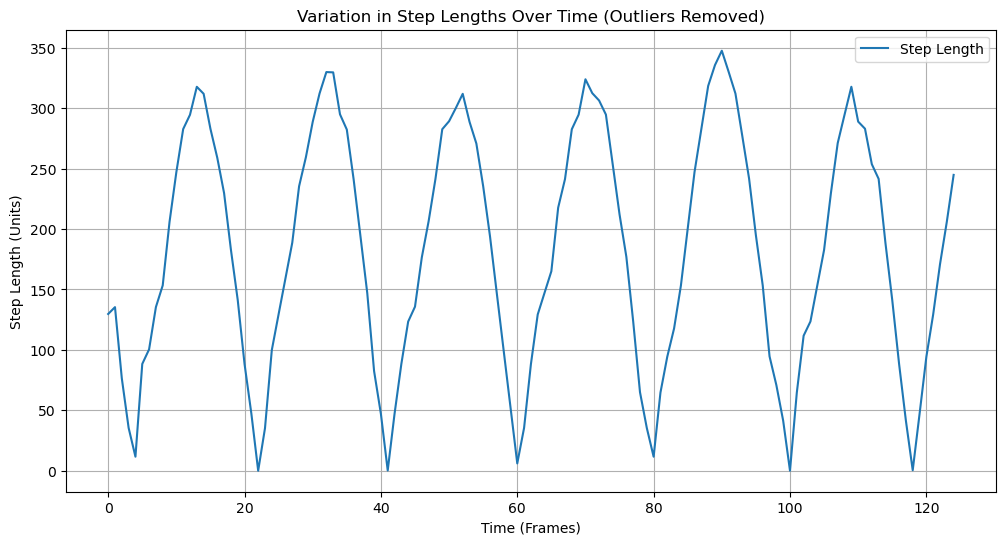

Plot saved to step_lengths_over_time.png
Data saved to step_lengths_data.csv


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def calculate_step_length(keypoints_data):
    step_lengths = []
    for left_ankle, right_ankle in zip(keypoints_data['left_ankle'], keypoints_data['right_ankle']):
        if all(np.isfinite(left_ankle + right_ankle)):
            # Assuming [0] is the x-coordinate
            step_length = abs(left_ankle[0] - right_ankle[0])
            step_lengths.append(step_length)
    return step_lengths

def remove_outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]
    return filtered_data

# Calculate step lengths
step_lengths = calculate_step_length(keypoints_data)

# Remove outliers using IQR method
filtered_step_lengths = remove_outliers_iqr(step_lengths)

# Plotting the step lengths after removing outliers
time_points = np.arange(len(filtered_step_lengths))
plt.figure(figsize=(12, 6))
plt.plot(time_points, filtered_step_lengths, label='Step Length')
plt.xlabel('Time (Frames)')
plt.ylabel('Step Length (Units)')
plt.title('Variation in Step Lengths Over Time (Outliers Removed)')
plt.legend()
plt.grid(True)

# Save the plot
plot_filename = "step_lengths_over_time.png"  # You can change the file path and name as needed
plt.savefig(plot_filename)

plt.show()  # Display the plot

# Save the step lengths data as a CSV file
df_step_lengths = pd.DataFrame({'Time_Frames': time_points, 'Step_Lengths': filtered_step_lengths})
csv_filename = "step_lengths_data.csv"  # You can change the file path and name as needed
df_step_lengths.to_csv(csv_filename, index=False)

print(f"Plot saved to {plot_filename}")
print(f"Data saved to {csv_filename}")


Correlation between Ankle and Knee: 0.9534951559128837
Correlation between Ankle and Hip: 0.1528195790687425
Correlation between Ankle and Shoulder: -0.5037336351312268
Correlation between Knee and Ankle: 0.9534951559128837
Correlation between Knee and Hip: 0.3084781941657718
Correlation between Knee and Shoulder: -0.3270847527419606
Correlation between Hip and Ankle: 0.1528195790687425
Correlation between Hip and Knee: 0.3084781941657718
Correlation between Hip and Shoulder: 0.6974055969625459
Correlation between Shoulder and Ankle: -0.5037336351312268
Correlation between Shoulder and Knee: -0.3270847527419606
Correlation between Shoulder and Hip: 0.6974055969625459
Correlation between Ankle and Knee: 0.9534951559128837
Correlation between Ankle and Hip: 0.1528195790687425
Correlation between Ankle and Shoulder: -0.5037336351312268
Correlation between Knee and Ankle: 0.9534951559128837
Correlation between Knee and Hip: 0.3084781941657718
Correlation between Knee and Shoulder: -0.32708

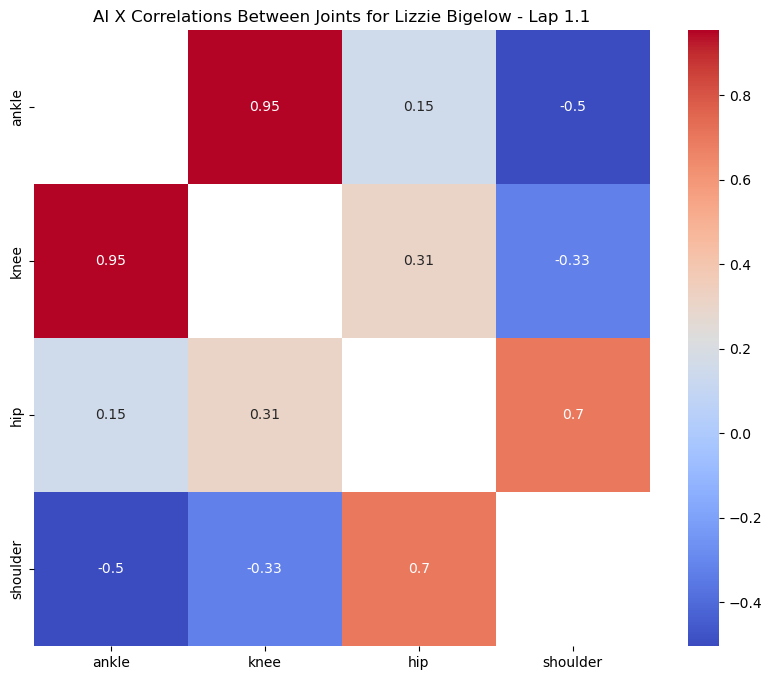

Results saved to C:\Users\dgriff06\AthleteAnalysis\results_data/Lizzie Bigelow_Lap1.1_correlation_analysis.csv
Heatmap saved to C:\Users\dgriff06\AthleteAnalysis\visuals/Lizzie Bigelow_Lap1.1_correlation_heatmap.png


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def calculate_ai_for_frame(keypoints_data, joint, frame_index):
    left_keypoint = keypoints_data.get(f'left_{joint}', [])[frame_index]
    right_keypoint = keypoints_data.get(f'right_{joint}', [])[frame_index]

    # Check if both keypoints are valid
    if all(np.isfinite(kp) for kp in left_keypoint + right_keypoint):
        ai_x = left_keypoint[0] - right_keypoint[0]
        ai_y = left_keypoint[1] - right_keypoint[1]
        return ai_x, ai_y
    return None, None  # Return None if keypoints are not valid

def calculate_joint_ai_series(keypoints_data, joint):
    ai_x_series, ai_y_series = [], []
    num_frames = len(keypoints_data.get(f'left_{joint}', []))
    for frame_index in range(num_frames):
        ai_x, ai_y = calculate_ai_for_frame(keypoints_data, joint, frame_index)
        if ai_x is not None and ai_y is not None:
            ai_x_series.append(ai_x)
            ai_y_series.append(ai_y)
    return np.array(ai_x_series), np.array(ai_y_series)
def perform_correlation_analysis(keypoints_data):
    correlations = {}
    for joint1 in ['ankle', 'knee', 'hip', 'shoulder']:
        for joint2 in ['ankle', 'knee', 'hip', 'shoulder']:
            if joint1 != joint2:
                ai_x1_series, _ = calculate_joint_ai_series(keypoints_data, joint1)
                ai_x2_series, _ = calculate_joint_ai_series(keypoints_data, joint2)

                # Pair values for the same frames
                paired_series = [(x1, x2) for x1, x2 in zip(ai_x1_series, ai_x2_series) if np.isfinite(x1) and np.isfinite(x2)]
                if len(paired_series) > 1:
                    paired_x1, paired_x2 = zip(*paired_series)
                    corr_x, _ = stats.pearsonr(paired_x1, paired_x2)  # Calculate correlation coefficient
                    correlations[(joint1, joint2)] = {'AI X Correlation': corr_x}
                else:
                    correlations[(joint1, joint2)] = {'AI X Correlation': 'Insufficient data'}

    return correlations

# Then, run the analysis and print the results as before
correlation_results = perform_correlation_analysis(keypoints_data)

for joint_pair, corr in correlation_results.items():
    print(f"Correlation between {joint_pair[0].capitalize()} and {joint_pair[1].capitalize()}: {corr['AI X Correlation']}")

correlation_results = perform_correlation_analysis(keypoints_data)


for joint_pair, corr in correlation_results.items():
    print(f"Correlation between {joint_pair[0].capitalize()} and {joint_pair[1].capitalize()}: {corr['AI X Correlation']}")
def save_correlation_results(correlation_results, athlete_name, lap_id, results_folder, visuals_folder):
    # Ensure results and visuals folders exist
    os.makedirs(results_folder, exist_ok=True)
    os.makedirs(visuals_folder, exist_ok=True)

    results_folder = r'C:\Users\dgriff06\AthleteAnalysis\results_data'
    visuals_folder = r'C:\Users\dgriff06\AthleteAnalysis\visuals'

    # Initialize an empty DataFrame
    joints = ['ankle', 'knee', 'hip', 'shoulder']
    corr_matrix = pd.DataFrame(index=joints, columns=joints, data=np.nan)

    # Populate the DataFrame with correlation results
    for (joint1, joint2), value in correlation_results.items():
        corr_matrix.loc[joint1, joint2] = value['AI X Correlation']
        corr_matrix.loc[joint2, joint1] = value['AI X Correlation']  # Mirror the matrix

    # Save results to CSV
    csv_file_path = f'{results_folder}/{athlete_name}_Lap{lap_id}_correlation_analysis.csv'
    corr_matrix.to_csv(csv_file_path)

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title(f'AI X Correlations Between Joints for {athlete_name} - Lap {lap_id}')

    # Save heatmap
    heatmap_file_path = f'{visuals_folder}/{athlete_name}_Lap{lap_id}_correlation_heatmap.png'
    plt.savefig(heatmap_file_path)
    plt.show()

    return csv_file_path, heatmap_file_path

athlete_name = input("Enter athlete's name: ")
lap_id = input("Enter lap ID: ")
results_folder = r'C:\Users\dgriff06\AthleteAnalysis\results'
visuals_folder = r'C:\Users\dgriff06\AthleteAnalysis\visuals'

csv_path, heatmap_path = save_correlation_results(correlation_results, athlete_name, lap_id, results_folder, visuals_folder)
print(f"Results saved to {csv_path}")
print(f"Heatmap saved to {heatmap_path}")


Available joints in keypoints_data: dict_keys(['nose', 'neck', 'right_shoulder', 'right_elbow', 'right_wrist', 'left_shoulder', 'left_elbow', 'left_wrist', 'mid_hip', 'right_hip', 'right_knee', 'right_ankle', 'left_hip', 'left_knee', 'left_ankle', 'right_eye', 'left_eye', 'right_ear', 'left_ear', 'left_big_toe', 'left_small_toe', 'left_heel', 'right_big_toe', 'right_small_toe', 'right_heel'])


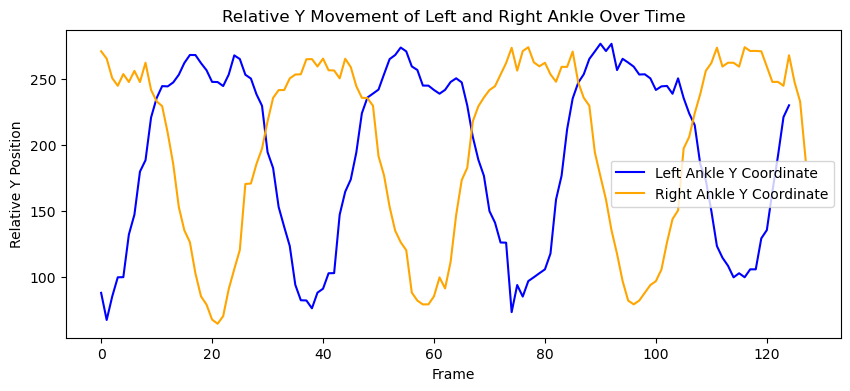

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_3.1_ankle_movement.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_3.1_ankle_movement_data.csv


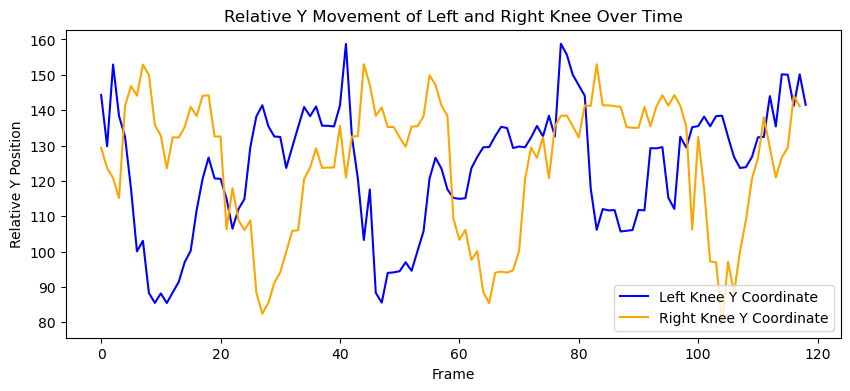

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_3.1_knee_movement.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_3.1_knee_movement_data.csv


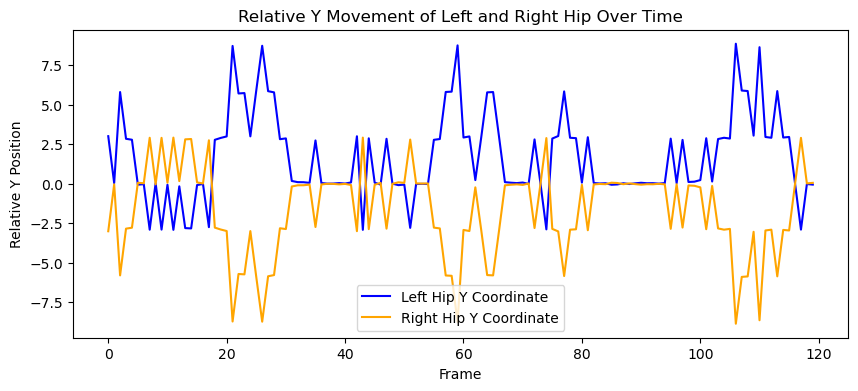

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_3.1_hip_movement.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_3.1_hip_movement_data.csv


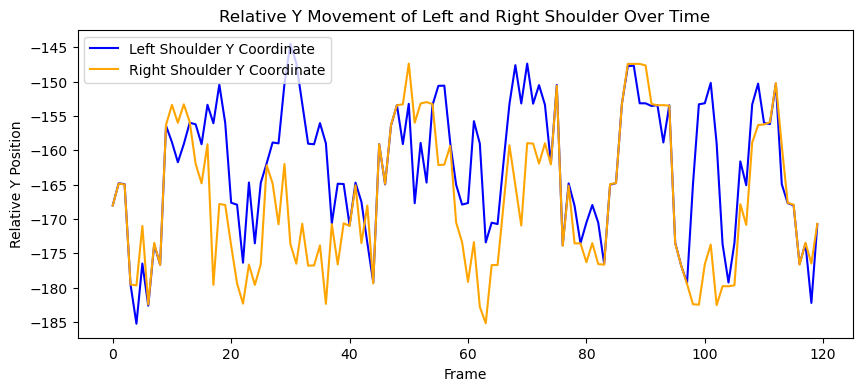

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_3.1_shoulder_movement.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_3.1_shoulder_movement_data.csv


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print("Available joints in keypoints_data:", keypoints_data.keys())


def plot_joint_movement(keypoints_data, joint_name, athlete_name, lap_id, save_path):
    # Calculate relative positions for the left and right joints
    rel_positions_left = calculate_relative_positions(keypoints_data, ['left_hip', 'right_hip'], f'left_{joint_name}')
    rel_positions_right = calculate_relative_positions(keypoints_data, ['left_hip', 'right_hip'], f'right_{joint_name}')

    # Extract Y-coordinates
    y_coords_left = [pos[1] for pos in rel_positions_left if np.all(np.isfinite(pos))]
    y_coords_right = [pos[1] for pos in rel_positions_right if np.all(np.isfinite(pos))]

    # Remove the last 5 frames from the right shoulder data if it's the joint in question
    if joint_name == 'shoulder':
        y_coords_right = y_coords_right[:-10]
    if joint_name == 'shoulder':
        y_coords_left = y_coords_left[:-10]
        
    if joint_name == 'knee':
        y_coords_right = y_coords_right[:-10]
    if joint_name == 'knee':
        y_coords_left = y_coords_left[:-10]
        
    if joint_name == 'hip':
        y_coords_right = y_coords_right[:-10]
    if joint_name == 'hip':
        y_coords_left = y_coords_left[:-10]
    # Plotting the data for visual inspection
    plt.figure(figsize=(10, 4))
    plt.plot(y_coords_left, label=f'Left {joint_name.capitalize()} Y Coordinate', color='blue')
    plt.plot(y_coords_right, label=f'Right {joint_name.capitalize()} Y Coordinate', color='orange')
    plt.xlabel('Frame')
    plt.ylabel('Relative Y Position')
    plt.title(f'Relative Y Movement of Left and Right {joint_name.capitalize()} Over Time')
    plt.legend()

    # Save the plot
    plot_filename = f"{save_path}/{athlete_name}_{lap_id}_{joint_name}_movement.png"
    plt.savefig(plot_filename)
    plt.show()

    # Save the data as CSV
    df_left = pd.DataFrame({f'Left_{joint_name}_Y_Coordinate': y_coords_left})
    df_right = pd.DataFrame({f'Right_{joint_name}_Y_Coordinate': y_coords_right})
    df_combined = pd.concat([df_left, df_right], axis=1)
    csv_filename = f"{save_path}/{athlete_name}_{lap_id}_{joint_name}_movement_data.csv"
    df_combined.to_csv(csv_filename, index=False)

    print(f"Plot saved to {plot_filename}")
    print(f"Data saved to {csv_filename}")

# Example usage
athlete_name = 'Lizzie Bigelow'  # Replace with the actual athlete's name
lap_id = '3.1'  # Replace with the actual lap ID
save_path = r'C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG'  # Replace with your desired save path

# Apply this function to each joint
joints = ['ankle', 'knee', 'hip', 'shoulder']
for joint in joints:
    plot_joint_movement(keypoints_data, joint, athlete_name, lap_id, save_path)



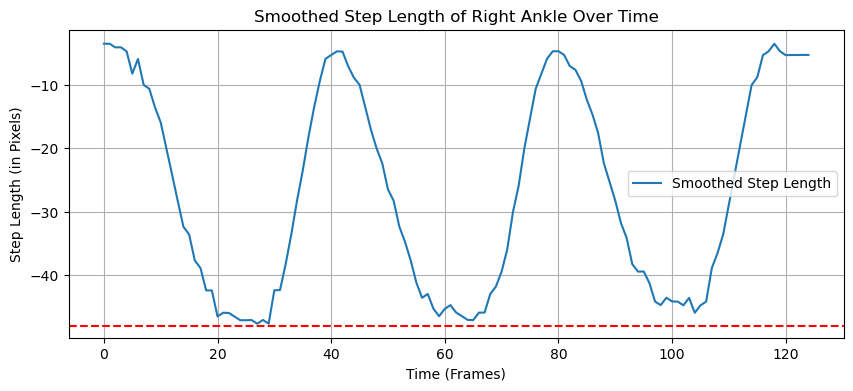

In [14]:
import numpy as np

# Function to remove outliers based on Z-score
def remove_outliers(data, threshold=2):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    filtered_data = data[z_scores < threshold]
    return filtered_data

# Adjusted step length calculation with outlier removal
def calculate_step_length_adjusted(keypoints_data, target_part, threshold=100):
    step_lengths = []

    for i in range(1, len(keypoints_data[target_part])):
        prev_position = np.array(keypoints_data[target_part][i - 1])
        curr_position = np.array(keypoints_data[target_part][i])

        if all(prev_position) and all(curr_position):
            step_length = curr_position[0] - prev_position[0]
            
            # Check if step length is within the threshold
            if abs(step_length) < threshold:
                step_lengths.append(step_length)
    
    return step_lengths

# Calculate step length for the right ankle with outlier removal and threshold adjustment
right_ankle_step_lengths_adjusted = calculate_step_length_adjusted(keypoints_data, 'right_ankle', threshold=100)

# Remove outliers from the step lengths
filtered_step_lengths = remove_outliers(np.array(right_ankle_step_lengths_adjusted))

# Apply a moving average filter to smooth the step length data
window_size = 10  # Adjust the window size as needed
smoothed_step_lengths = np.convolve(filtered_step_lengths, np.ones(window_size)/window_size, mode='same')

import matplotlib.pyplot as plt

# Create a time axis (frames or time intervals, depending on your data)
time_axis = range(len(filtered_step_lengths))

# Create a plot for the smoothed step lengths
plt.figure(figsize=(10, 4))
plt.plot(time_axis, smoothed_step_lengths, label='Smoothed Step Length')
plt.xlabel('Time (Frames)')
plt.ylabel('Step Length (in Pixels)')
plt.title('Smoothed Step Length of Right Ankle Over Time')
plt.legend()

# Add a threshold line for the ground (you can adjust the y-coordinate as needed)
ground_threshold = -48  # Adjust the threshold value as needed
plt.axhline(ground_threshold, color='red', linestyle='--', label='Ground Threshold')

plt.grid(True)

# Save or display the plot
plt.savefig('step_length_plot_with_threshold.png')  # Save the plot as an image
plt.show()  # Display the plot

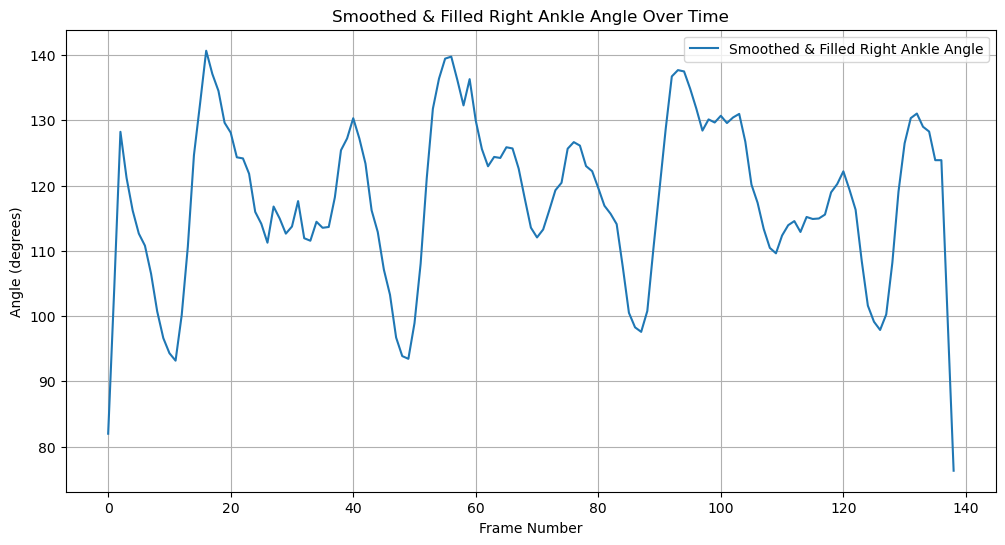

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_right_ankle_angles.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_right_ankle_angles.csv


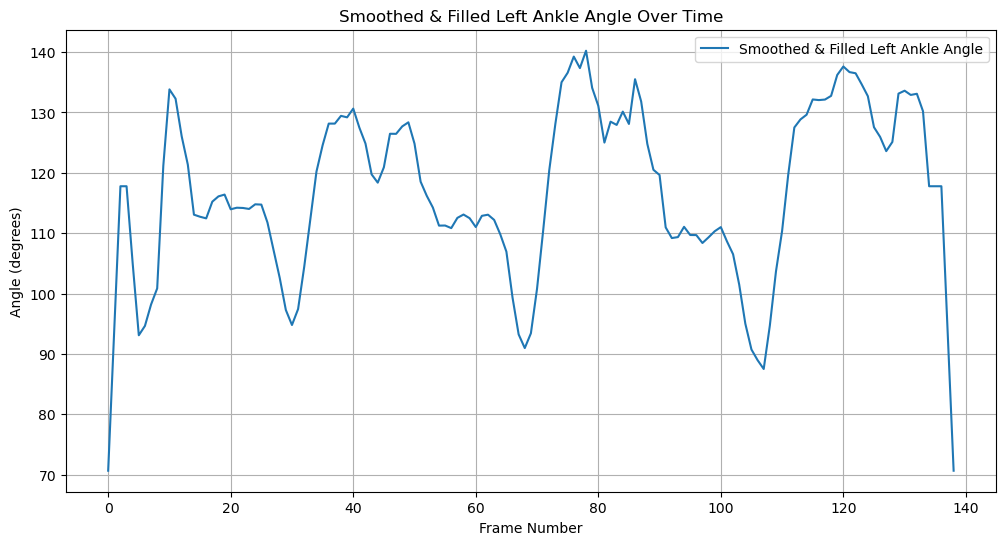

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_left_ankle_angles.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_left_ankle_angles.csv


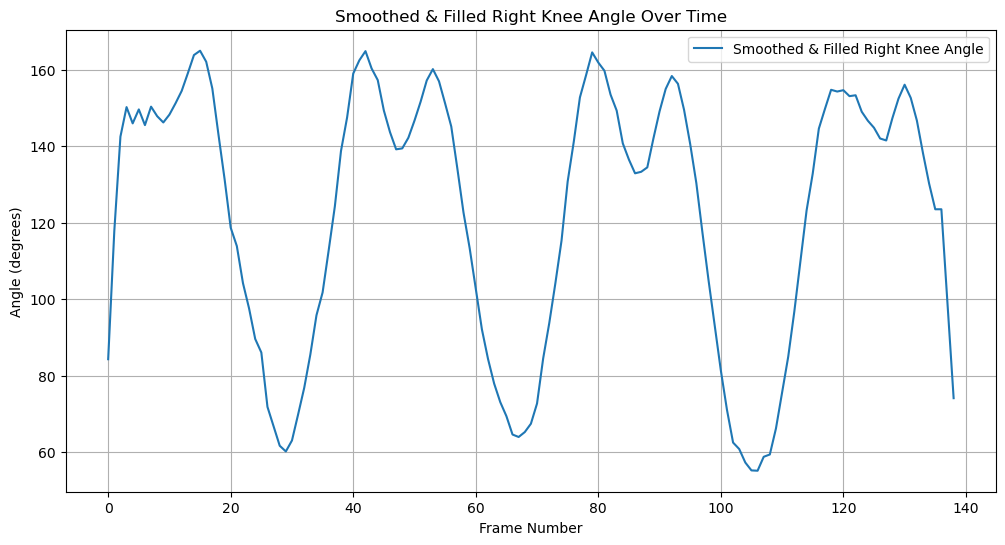

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_right_knee_angles.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_right_knee_angles.csv


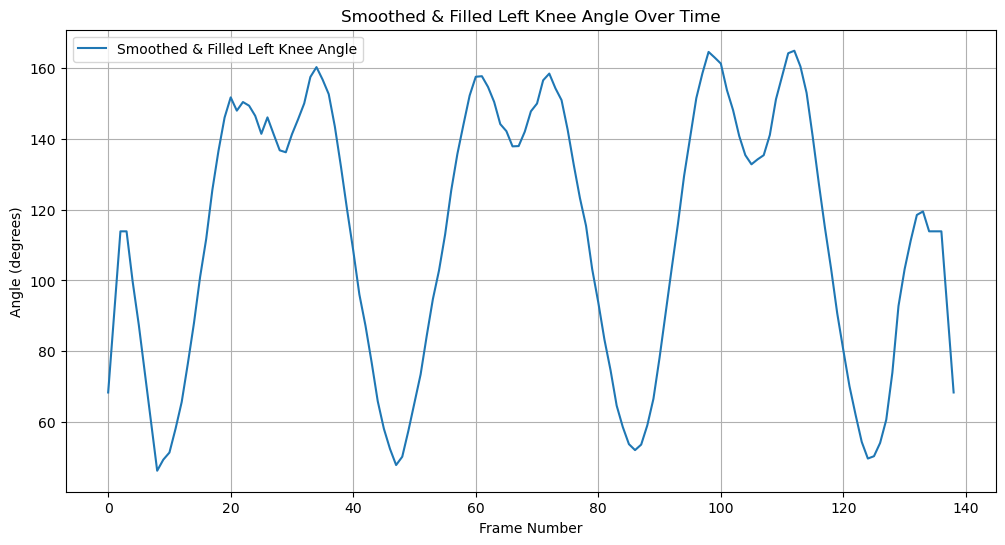

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_left_knee_angles.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_left_knee_angles.csv


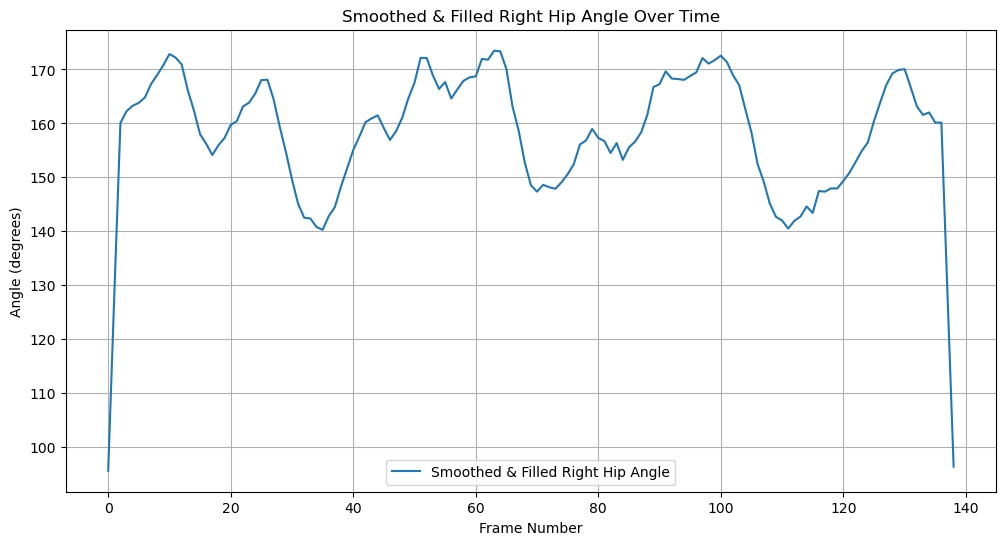

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_right_hip_angles.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_right_hip_angles.csv


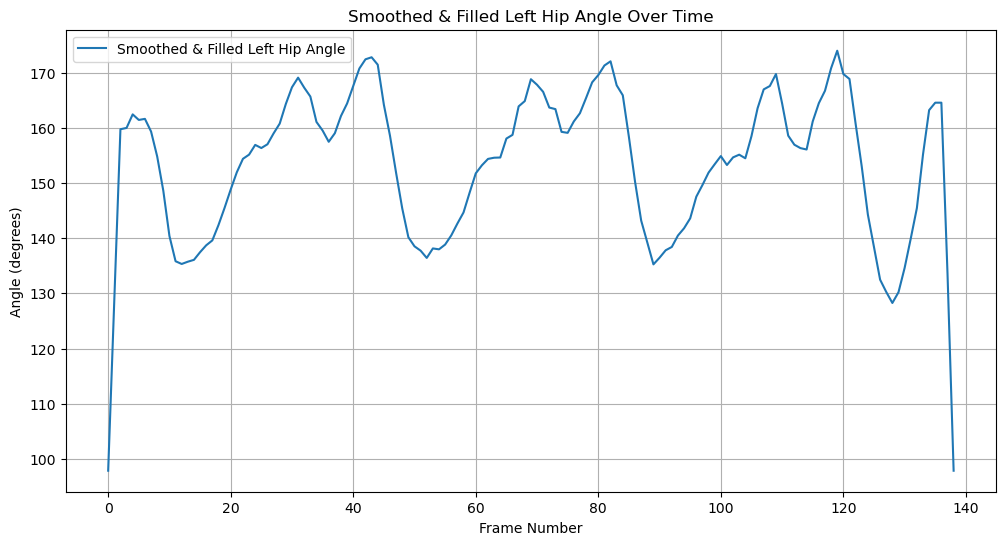

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_left_hip_angles.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_left_hip_angles.csv


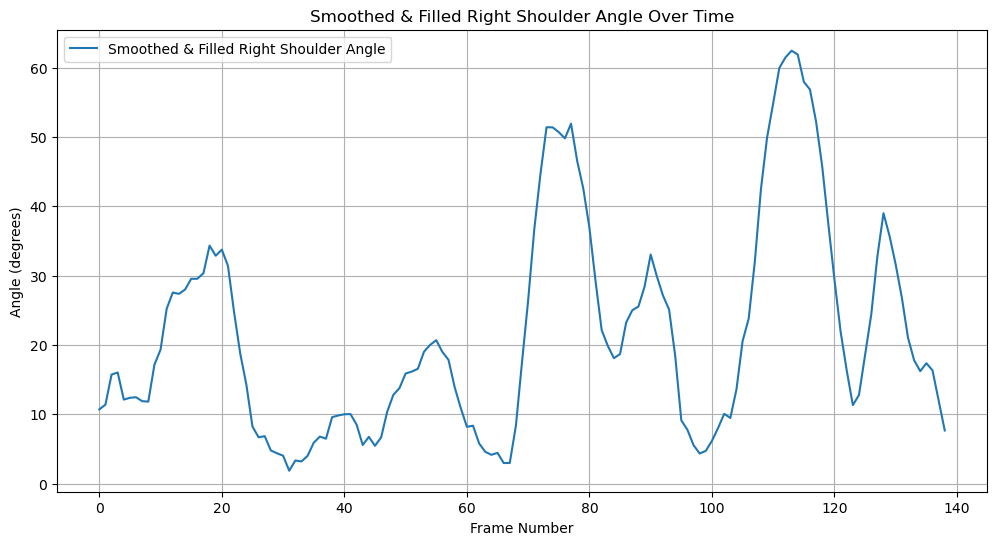

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_right_shoulder_angles.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_right_shoulder_angles.csv


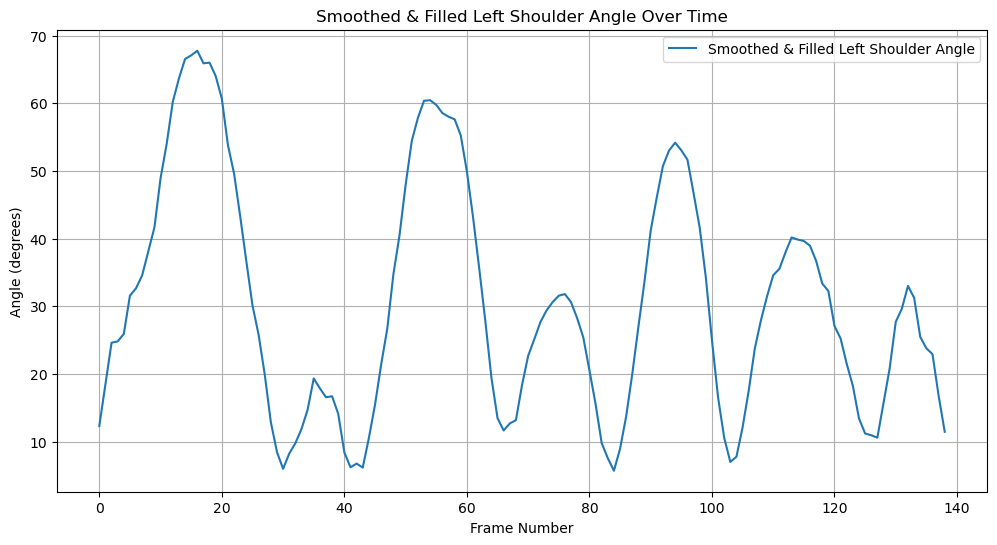

Plot saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_left_shoulder_angles.png
Data saved to C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG/Lizzie Bigelow_1.1_left_shoulder_angles.csv


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

def calculate_angle(pointA, pointB, pointC):
    vector1 = np.array(pointA) - np.array(pointB)
    vector2 = np.array(pointC) - np.array(pointB)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    # Check if magnitudes are too small or points are identical
    if magnitude1 < 1e-6 or magnitude2 < 1e-6:
        return np.nan  # Return NaN as the angle can't be computed accurately

    dot_product = np.dot(vector1, vector2)
    angle_radians = np.arccos(dot_product / (magnitude1 * magnitude2))
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees

def calculate_joint_angles(keypoints_data, joint_name, side='right'):
    angles = []

    for i in range(len(keypoints_data[f'{side}_{joint_name}'])):
        if joint_name == 'ankle':
            pointA = keypoints_data[f'{side}_knee'][i][:2]
            pointB = keypoints_data[f'{side}_ankle'][i][:2]
            pointC = keypoints_data[f'{side}_big_toe'][i][:2]
        elif joint_name == 'knee':
            pointA = keypoints_data[f'{side}_hip'][i][:2]
            pointB = keypoints_data[f'{side}_knee'][i][:2]
            pointC = keypoints_data[f'{side}_ankle'][i][:2]
        elif joint_name == 'hip':
            pointA = keypoints_data[f'{side}_shoulder'][i][:2]
            pointB = keypoints_data[f'{side}_hip'][i][:2]
            pointC = keypoints_data[f'{side}_knee'][i][:2]
        elif joint_name == 'shoulder':
            pointA = keypoints_data[f'{side}_elbow'][i][:2]
            pointB = keypoints_data[f'{side}_shoulder'][i][:2]
            pointC = keypoints_data[f'{side}_hip'][i][:2]
        else:
            continue  # Skip if joint name is not recognized

        # Calculate angle if all points are valid
        if all(np.isfinite(pointA)) and all(np.isfinite(pointB)) and all(np.isfinite(pointC)):
            angle = calculate_angle(pointA, pointB, pointC)
            angles.append(angle)
        else:
            angles.append(np.nan)  # Use NaN for missing or invalid data

    return angles

def fill_nan_values(data, fill_method='mean'):
    if np.all(np.isnan(data)):
        return data  # Return as is if all values are NaN

    if fill_method == 'mean':
        fill_value = np.nanmean(data)
    elif fill_method == 'median':
        fill_value = np.nanmedian(data)
    else:
        raise ValueError("Invalid fill method. Use 'mean' or 'median'.")

    return np.nan_to_num(data, nan=fill_value)

def smooth_and_plot_angles(keypoints_data, joint_name, athlete_name, lap_id, save_path, side='right', window_size=5):
    # Ensure window_size is a positive integer
    if window_size <= 0 or not isinstance(window_size, int):
        raise ValueError("window_size must be a positive integer")

    joint_angles = calculate_joint_angles(keypoints_data, joint_name, side)
    filled_angles = fill_nan_values(np.array(joint_angles), fill_method='mean')

    # Check if filled_angles is empty
    if filled_angles.size == 0:
        print(f"No data available for {side} {joint_name}. Skipping plot.")
        return

    # Apply moving average smoothing
    smoothed_angles = np.convolve(filled_angles, np.ones(window_size)/window_size, mode='same')
    frame_numbers = np.arange(len(smoothed_angles))

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(frame_numbers, smoothed_angles, label=f'Smoothed & Filled {side.capitalize()} {joint_name.capitalize()} Angle')
    plt.xlabel('Frame Number')
    plt.ylabel('Angle (degrees)')
    plt.title(f'Smoothed & Filled {side.capitalize()} {joint_name.capitalize()} Angle Over Time')
    plt.legend()
    plt.grid(True)

    # Save the plot
    plot_filename = f"{save_path}/{athlete_name}_{lap_id}_{side}_{joint_name}_angles.png"
    plt.savefig(plot_filename)
    plt.show()

    # Save the data as CSV
    df = pd.DataFrame({'Frame': frame_numbers, 'Angle': smoothed_angles})
    csv_filename = f"{save_path}/{athlete_name}_{lap_id}_{side}_{joint_name}_angles.csv"
    df.to_csv(csv_filename, index=False)

    print(f"Plot saved to {plot_filename}")
    print(f"Data saved to {csv_filename}")

# Example usage
athlete_name = 'Lizzie Bigelow'  # Replace with the actual athlete's name
lap_id = '1.1'  # Replace with the actual lap ID
save_path = r'C:\Users\dgriff06\AthleteAnalysis\organized_data\IMG'  # Replace with your desired save path

# Apply this function to each joint
joints = ['ankle', 'knee', 'hip', 'shoulder']
for joint in joints:
    smooth_and_plot_angles(keypoints_data, joint, athlete_name, lap_id, save_path, side='right')
    smooth_and_plot_angles(keypoints_data, joint, athlete_name, lap_id, save_path, side='left')


In [16]:
import numpy as np
import pandas as pd

# Placeholder functions and data for demonstration
def calculate_ai(left_data, right_data):
    """Calculate the Asymmetry Index (AI) between left and right data."""
    min_length = min(len(left_data), len(right_data))
    left_data = np.array(left_data[:min_length])
    right_data = np.array(right_data[:min_length])

    ai_values = np.abs(left_data - right_data) / ((left_data + right_data) / 2) * 100
    return np.nanmean(ai_values)

def calculate_temporal_consistency(data):
    """Calculate the temporal consistency as the standard deviation."""
    return np.nanstd(data)

# Placeholder for calculate_joint_angles and keypoints_data
def calculate_joint_angles(keypoints_data, joint_name, side):
    # Placeholder implementation
    return np.random.normal(size=100)  # Random data for demonstration

keypoints_data = {}  # Placeholder for actual keypoints data
joints = ['ankle', 'knee', 'hip', 'shoulder']
ai_results = {}
consistency_results = {}

for joint in joints:
    left_angles = calculate_joint_angles(keypoints_data, joint, 'left')
    right_angles = calculate_joint_angles(keypoints_data, joint, 'right')
    ai_results[joint] = calculate_ai(left_angles, right_angles)

    joint_angles = calculate_joint_angles(keypoints_data, joint, 'right')  # Choose side
    consistency_results[joint] = calculate_temporal_consistency(joint_angles)

# Save the AI and consistency results to CSV
athlete_name = "Athlete_Name"  # Replace with actual athlete's name
lap_id = "Lap_ID"  # Replace with actual lap ID
ai_csv_filename = f"{athlete_name}_{lap_id}_ai_results.csv"
consistency_csv_filename = f"{athlete_name}_{lap_id}_consistency_results.csv"

# Save AI results
ai_df = pd.DataFrame(ai_results.items(), columns=['Joint', 'Asymmetry Index'])
ai_df.to_csv(ai_csv_filename, index=False)

# Save consistency results
consistency_df = pd.DataFrame(consistency_results.items(), columns=['Joint', 'Temporal Consistency'])
consistency_df.to_csv(consistency_csv_filename, index=False)

ai_csv_filename, consistency_csv_filename  # Output file names for confirmation


('Athlete_Name_Lap_ID_ai_results.csv',
 'Athlete_Name_Lap_ID_consistency_results.csv')